In [342]:
#IMPORTING LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
#IMPORTING DATASET
data = pd.read_csv('Video_Game_Sales_as_of_Jan_2017.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


### PROCESSING DATA

In [344]:
#CHECKING ANY DUPLICATION IN DATASET (NO DUPLICATES DATA)
print(data.duplicated().sum())

0


In [345]:
#CHECKING MISSING VALUES IN EACH COLUMN
print(data.isnull().sum())

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64


In [346]:
#DROP GLOBAL_SALES ROWS WITH MISSING VALUE
data = data.dropna(subset=['Global_Sales'])

In [347]:
#CHECKING EACH DATASET DATA TYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.1+ MB


In [348]:
#Convert 'Year_of_Release' FROM FLOAT TO INT
data['Year_of_Release'] = data['Year_of_Release'].astype('Int64')

### VISUALIZATION

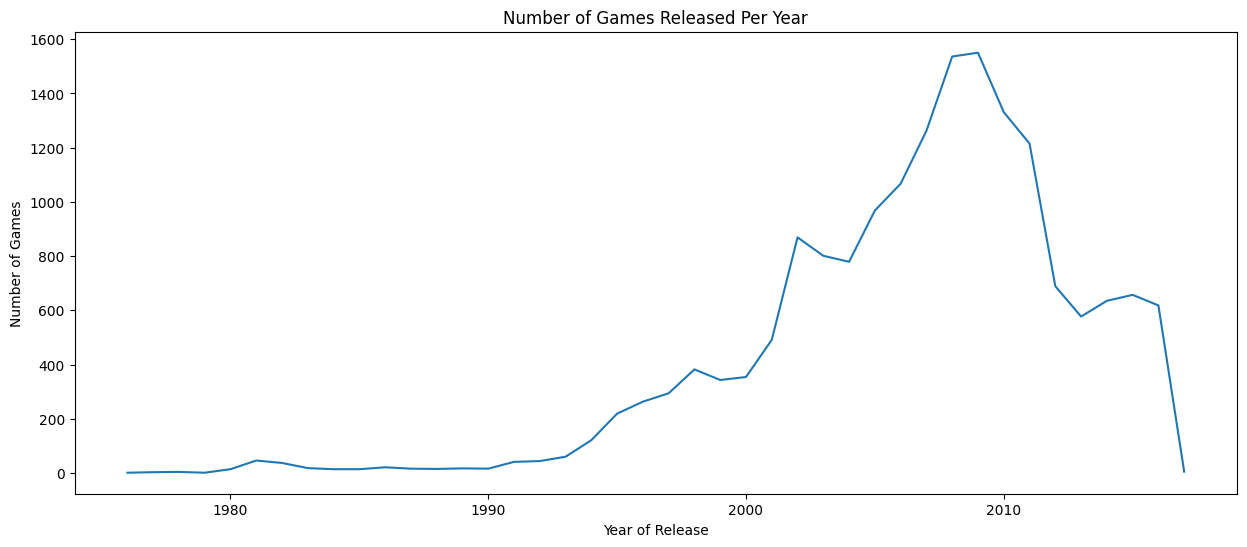

In [349]:
games_per_year = data['Year_of_Release'].value_counts().sort_index()
plt.figure(figsize=(15,6))
games_per_year.plot(kind='line')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

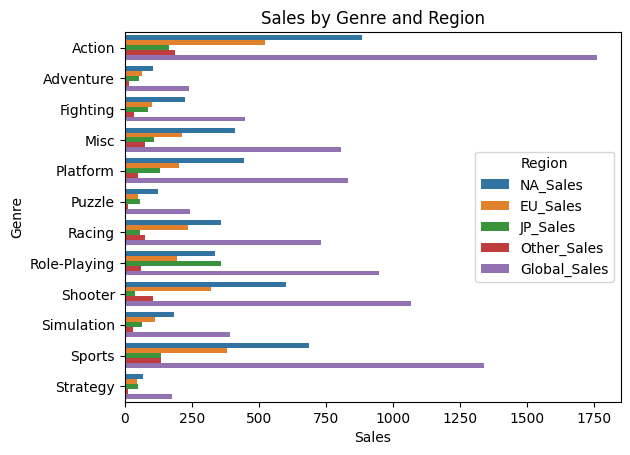

In [350]:
sales_by_genre = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
sales_by_genre_melted = pd.melt(sales_by_genre, id_vars=['Genre'], var_name='Region', value_name='Sales')
sns.barplot(x='Sales', y='Genre', hue='Region', data=sales_by_genre_melted)
plt.title('Sales by Genre and Region')
plt.show()

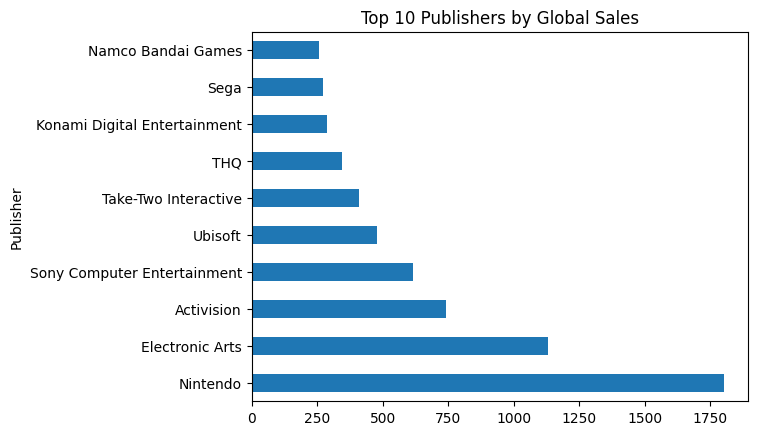

In [351]:
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publishers.plot(kind='barh')
plt.title('Top 10 Publishers by Global Sales')
plt.show()

In [352]:
# data.to_csv('cleaned_dataset.csv', index=False)